In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [33]:
img = cv.imread("view.jpg")
print(img)

[[[111  44  29]
  [107  40  25]
  [103  36  21]
  ...
  [211 220 229]
  [210 219 228]
  [208 217 226]]

 [[110  43  28]
  [108  41  26]
  [105  38  23]
  ...
  [211 220 229]
  [210 219 228]
  [208 217 226]]

 [[108  40  27]
  [109  41  28]
  [109  41  28]
  ...
  [211 220 229]
  [210 219 228]
  [208 217 226]]

 ...

 [[ 45  19   3]
  [ 49  23   7]
  [ 54  25  10]
  ...
  [ 44  17   3]
  [ 50  21   6]
  [ 55  27  10]]

 [[ 52  24   7]
  [ 56  28  11]
  [ 61  31  14]
  ...
  [ 47  20   6]
  [ 50  21   6]
  [ 52  23   8]]

 [[ 48  20   3]
  [ 54  26   9]
  [ 61  31  14]
  ...
  [ 52  25  11]
  [ 52  23   9]
  [ 53  24   9]]]


In [34]:
cv.imwrite("view.jpg", img)

True

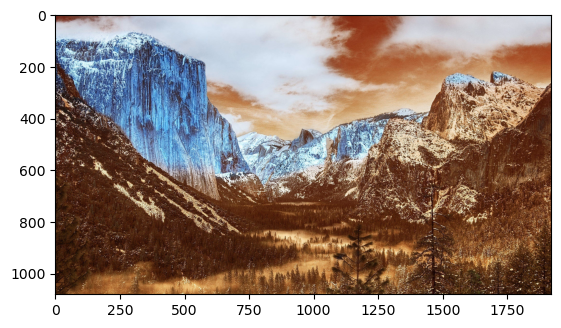

In [35]:
plt.imshow(img)
plt.show()

In [36]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [37]:
cv.imwrite("gray_view.jpg", gray)

True

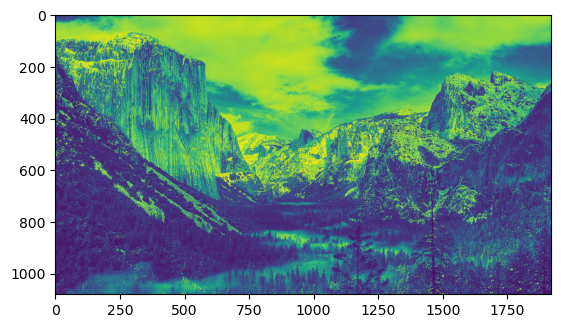

In [38]:
plt.imshow(gray)
plt.show()

In [39]:
cv.waitKey(0)
cv.destroyAllWindows()

In [42]:
import cv2 as cv

# 0 表示默认摄像头；也可填视频路径如 'test.mp4'
cap = cv.VideoCapture(0)

# 获取帧宽度、高度、FPS（摄像头可能返回 0，就手动设 30）
frame_w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv.CAP_PROP_FPS) or 30

# 创建 VideoWriter
fourcc = cv.VideoWriter_fourcc(*'mp4v')      # 编码格式
out = cv.VideoWriter('day2_output.mp4', fourcc, fps, (frame_w, frame_h), isColor=False)

print('按 q 退出，按空格暂停')

while True:
    ret, frame = cap.read()
    if not ret:
        print('❗ 取帧失败')
        break

    # 处理：灰度 + 高斯模糊
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (15, 15), 0)

    # 显示
    cv.imshow('Original', frame)
    cv.imshow('Day2 - Gray+Blur', blur)

    # 写视频（注意 VideoWriter 要求是灰度图）
    out.write(blur)

    # 按键控制
    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord(' '):
        cv.waitKey(0)          # 空格暂停，再按任意键继续

# 收尾
cap.release()
out.release()
cv.destroyAllWindows()
print('✅ 已保存 day2_output.mp4')


按 q 退出，按空格暂停
✅ 已保存 day2_output.mp4


In [50]:
cap = cv.VideoCapture(4)

In [51]:
ret, frame = cap.read()
print('ret =', ret)          # 应该 True
print('frame shape =', frame.shape if ret else 'None')

ret = False
frame shape = None
